In [1]:
import sys

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2E','C1E','O5D','C6D']
psi_dihedral=['C1E','O5D','C6D','C5D']

di_sugar=['DGD', 'DGD']
patterns1= ['DGD(*_*_)]-DGD(*_*_)', 'DGD(*_*_)-DGD(*_*_)','DGD(*_*_)]-[*]-DGD(*_*_)', 'DGD(*_*_)-[*]-DGD(*_*_)',]
patterns2= ['DGalpa1-6DGalpb', 'DGalpa1-6]DGalpb', 'DGalpa1-6[*]DGalpb']

patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 8 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 8 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 749 
valid torsion1 and torsion2: (749, 749)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//8htu.pdb B DGD 850 C1E
../../pdbs//8htu.pdb B DGD 850 O5D
51856 51853
Connection found between(2) 51856 and 51853
../../pdbs//7sa3.pdb C DGD 515 C1E
../../pdbs//7sa3.pdb C DGD 515 O5D
15272 15269
Connection found between(2) 15272 and 15269
../../pdbs//6yp7.pdb H DGD 102 C1E
../../pdbs//6yp7.pdb H DGD 102 O5D
68304 68301
Connection found between(2) 68304 and 68301
../../pdbs//6yp7.pdb a DGD 413 C1E
../../pdbs//6yp7.pdb a DGD 413 O5D
60900 60897
Connection found between(2) 60900 and 60897
../../pdbs//6yp7.pdb c DGD 518 C1E
../../pdbs//6yp7.pdb c DGD 518 O5D
63142 63139
Connection found between(2) 63142 and 63139
../../pdbs//6yp7.pdb C DGD 519 C1E
../../pdbs//6yp7.pdb C DGD 519 O5D
67434 67431
Connection found between(2) 67434 and 67431
../../pdbs//6yp7.pdb c DGD 517 C1E
../../pdbs//6yp7.pdb c DGD 517 O5D
63080 63077
Connection found between(2) 63080 and 63077
../../pdbs//6yp7.pdb C DGD 518 C1E
../../pdbs//6yp7.pdb C DGD 518 O5D
67372 67369
Connection found between(2) 67372 an

In [13]:
output_df.to_csv('DGalpa1-6DGalpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGalpa1-6DGalpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,8htu.pdb,B DGD 850 C2E C1E O5D C6D,B DGD 850 C1E O5D C6D C5D,197.913,235.1180,"([DGD(850_B_), DGD(850_B_)], [19.31, 19.31])",DGD(850_B_)-DGD(850_B_),DGalpa1-6DGalpb1-C39O5,None
1,7sa3.pdb,C DGD 515 C2E C1E O5D C6D,C DGD 515 C1E O5D C6D C5D,216.361,128.1980,"([DGD(515_C_), DGD(515_C_)], [26.57, 26.57])",DGD(515_C_)-DGD(515_C_),DGalpa1-6DGalpb1-C20O5,None
2,6yp7.pdb,H DGD 102 C2E C1E O5D C6D,H DGD 102 C1E O5D C6D C5D,222.436,138.5220,"([DGD(102_H_), DGD(102_H_)], [132.06, 132.06])",DGD(102_H_)-DGD(102_H_),DGalpa1-6DGalpb1-C35O5,None
3,6yp7.pdb,a DGD 413 C2E C1E O5D C6D,a DGD 413 C1E O5D C6D C5D,229.730,148.0460,"([DGD(413_a_), DGD(413_a_)], [160.65, 160.65])",DGD(413_a_)-DGD(413_a_),DGalpa1-6DGalpb1-C32O5,None
4,6yp7.pdb,c DGD 518 C2E C1E O5D C6D,c DGD 518 C1E O5D C6D C5D,114.753,106.2360,"([DGD(518_c_), DGD(518_c_)], [166.98, 166.98])",DGD(518_c_)-DGD(518_c_),DGalpa1-6DGalpb1-C35O5,None
...,...,...,...,...,...,...,...,...,...
744,7cji.pdb,C DGD 518 C2E C1E O5D C6D,C DGD 518 C1E O5D C6D C5D,232.988,262.5158,"([DGD(518_C_), DGD(518_C_)], [77.17, 77.17])",DGD(518_C_)-DGD(518_C_),DGalpa1-6DGalpb1-C35O5,None
745,7cji.pdb,H DGD 102 C2E C1E O5D C6D,H DGD 102 C1E O5D C6D C5D,195.952,163.6810,"([DGD(102_H_), DGD(102_H_)], [62.83, 62.83])",DGD(102_H_)-DGD(102_H_),DGalpa1-6DGalpb1-C35O5,None
746,7cji.pdb,C DGD 519 C2E C1E O5D C6D,C DGD 519 C1E O5D C6D C5D,190.808,207.4990,"([DGD(519_C_), DGD(519_C_)], [68.86, 68.86])",DGD(519_C_)-DGD(519_C_),DGalpa1-6DGalpb1-C35O5,None
747,7cji.pdb,C DGD 517 C2E C1E O5D C6D,C DGD 517 C1E O5D C6D C5D,213.526,130.8660,"([DGD(517_C_), DGD(517_C_)], [66.83, 66.83])",DGD(517_C_)-DGD(517_C_),DGalpa1-6DGalpb1-C35O5,None


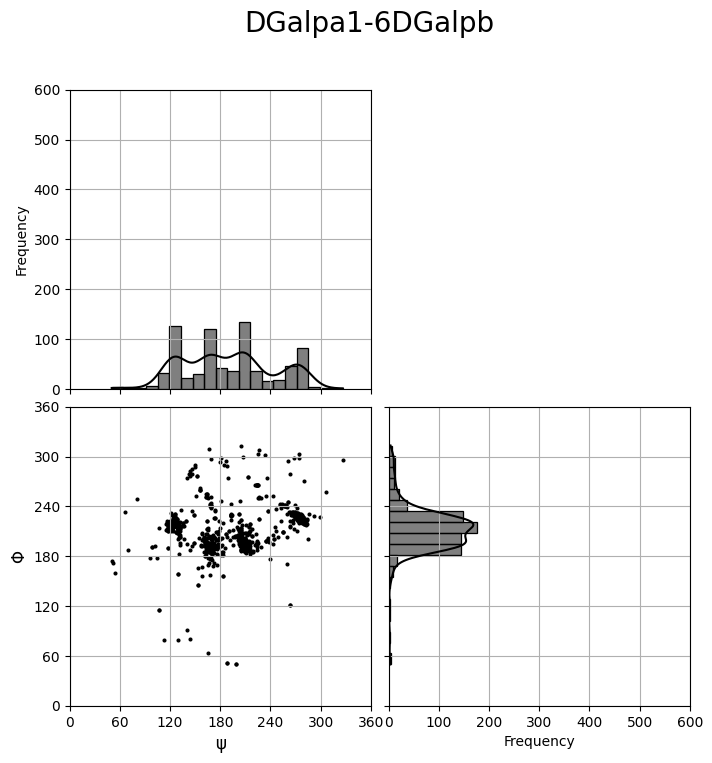

In [17]:
instant1.plot(torsions=output_df, title='DGalpa1-6DGalpb',max_histogram_scale=600,step_histogram_tick=100)